## Training an image classifier

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
#learn = tf.contrib.learn #old!
#tf.loggin.set_verbosity(tf.loggin.ERROR) #old!

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 4s 0us/step


8


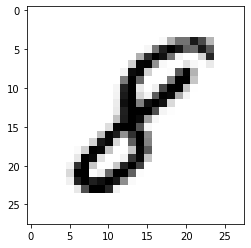

In [7]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(X_train[image_index], cmap='Greys')

In [8]:
X_train.shape

(60000, 28, 28)

In [13]:
#reshaping train and test data to 4-dim for keras API
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],X_test.shape[2],1)
print(X_train.shape)

(60000, 28, 28, 1)


In [14]:
#transform training values to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
#normalize the data by dividing with the max greyscale value: 255
max_GC = 255
X_train = X_train/max_GC
X_test = X_test/max_GC

In [18]:
#defining model
input_shape = (28, 28, 1)
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [19]:
#set optimizer and fit the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 25s 416us/step - loss: 0.5790 - accuracy: 0.8264
Epoch 2/10
60000/60000 [==============================] - 25s 414us/step - loss: 0.2247 - accuracy: 0.9329
Epoch 3/10
60000/60000 [==============================] - 25s 418us/step - loss: 0.1643 - accuracy: 0.9509
Epoch 4/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.1344 - accuracy: 0.9594
Epoch 5/10
60000/60000 [==============================] - 25s 422us/step - loss: 0.1168 - accuracy: 0.9645
Epoch 6/10
60000/60000 [==============================] - 26s 432us/step - loss: 0.1043 - accuracy: 0.9677
Epoch 7/10
60000/60000 [==============================] - 26s 441us/step - loss: 0.0947 - accuracy: 0.9712
Epoch 8/10
60000/60000 [==============================] - 27s 446us/step - loss: 0.0853 - accuracy: 0.9737
Epoch 9/10
60000/60000 [==============================] - 27s 451us/step - loss: 0.0796 - accuracy: 0.9750s
Epoch 10/10
60000/60000 [===========

In [20]:
#model evaluation: prediction + accuracy test
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 91us/step


[0.07234591585695743, 0.9782999753952026]

9
prediction: 9


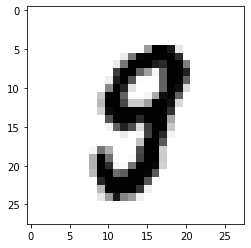

In [28]:
#our prediction testing
img_idx = 448
print(y_test[img_idx])
plt.imshow(X_test[img_idx].reshape(28,28), cmap='Greys')
prediction = model.predict(X_test[img_idx].reshape(1,28,28,1))
print('prediction: '+str(prediction.argmax()))